In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import random


## Load the images

In [2]:
tumor = []
no_tumor = []

img_size = 224  # Size to which images will be resized

# Tumor images
for file in glob.glob("../data/brain_tumor_dataset/yes/*"):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.resize(img, (img_size, img_size))
        img = img / 255.0  # Normalize pixel values to [0, 1]
        tumor.append(img)

# No tumor images
for file in glob.glob("../data/brain_tumor_dataset/no/*"):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.resize(img, (img_size, img_size))
        img = img / 255.0  # Normalize pixel values to [0, 1]
        no_tumor.append(img)
        



In [3]:
len(tumor)

155

In [4]:
len(no_tumor)

98

In [23]:
len(tumor)+ len(no_tumor)

253

In [5]:
tumor = np.array(tumor)
no_tumor = np.array(no_tumor)


Concatenate the dataset

In [6]:
data = np.concatenate((tumor, no_tumor), axis=0)

In [7]:
y = np.concatenate((np.ones(len(tumor)), np.zeros(len(no_tumor))), axis=0)


In [8]:
print("Dataset shape:", data.shape)
print("Labels shape:", y.shape)


Dataset shape: (253, 224, 224, 3)
Labels shape: (253,)


In [9]:
tumor.shape

(155, 224, 224, 3)

In [10]:
no_tumor.shape

(98, 224, 224, 3)

## EDA

In [11]:
print("Total tumor images:", len(tumor))
print("Total no tumor images:", len(no_tumor))


Total tumor images: 155
Total no tumor images: 98


In [12]:
y = [1] * len(tumor) + [0] * len(no_tumor)  # Corresponding labels (1 for tumor, 0 for no tumor)


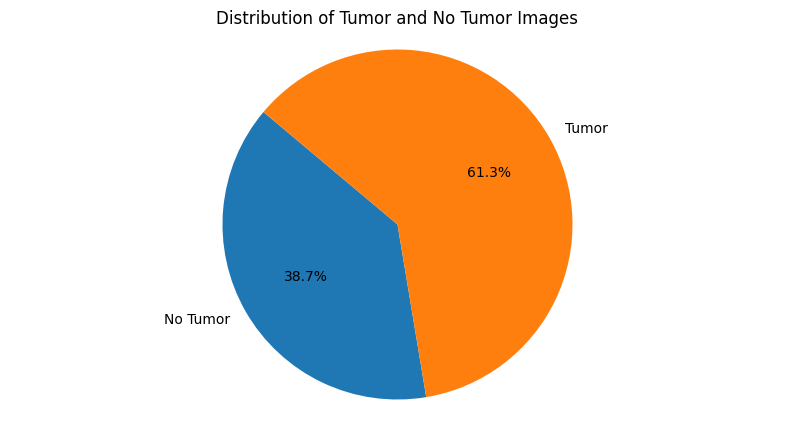

In [13]:
labels = ['No Tumor', 'Tumor']
plt.figure(figsize=(10, 5))
plt.pie(np.bincount(y), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tumor and No Tumor Images')
plt.axis('equal')  
plt.show()

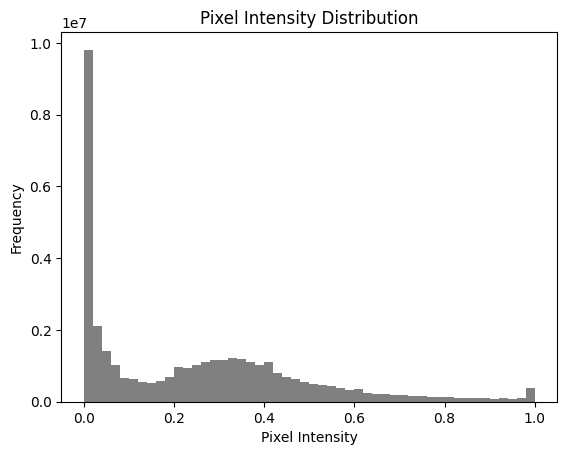

In [21]:
plt.hist(data.flatten(), bins=50, color='gray')  # Flatten the image and plot the histogram
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [15]:
print("Original pixel values range of first image:", np.min(data), np.max(data))


Original pixel values range of first image: 0.0 1.0


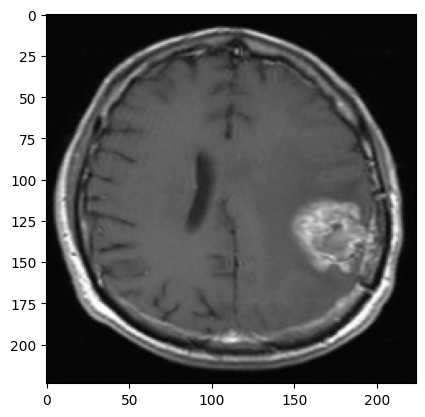

In [16]:
plt.imshow(tumor[0])

Visulizing randomly healthy(no tumor) and tumor

In [17]:
def random_image(no_tumor, tumor, num=4):
    no_tumor_imgs = no_tumor[np.random.choice(no_tumor.shape[0], num , replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]

    # Plotting the no_tumor images
    plt.figure(figsize=(18, 10))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(no_tumor_imgs[i])
        plt.title('No Tumor')

    # Plotting the tumor images
    plt.figure(figsize=(18, 10))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(tumor_imgs[i])
        plt.title('Tumor')
    


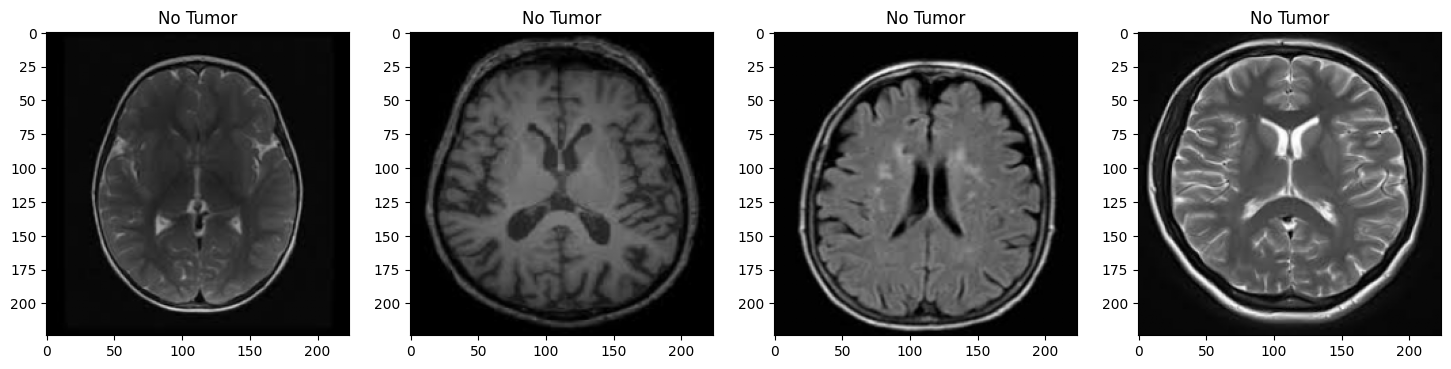

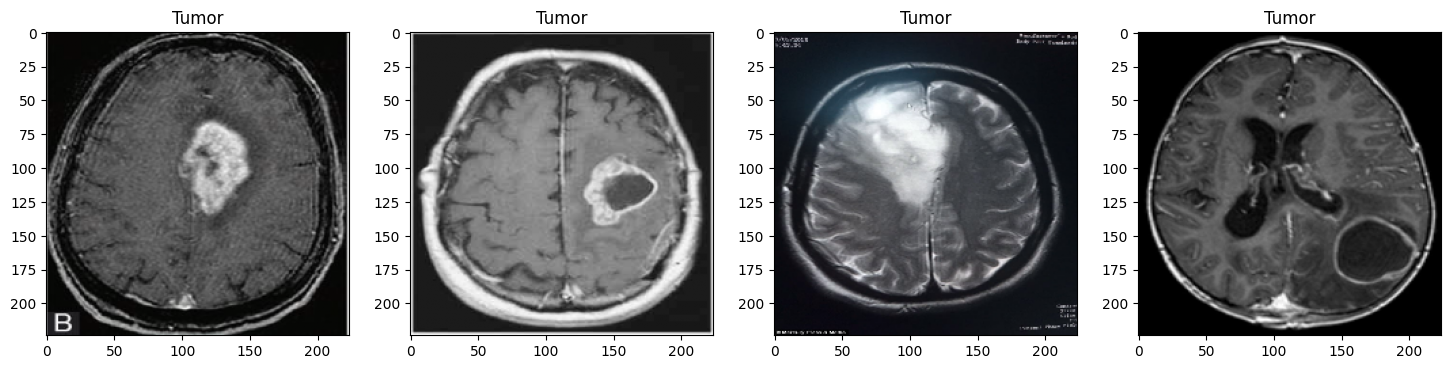

In [18]:
random_image(no_tumor, tumor)

In [ ]:

def convert_to_jpeg(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)  # Create output folder if it doesn’t exist

    for file in glob(os.path.join(input_folder, "*")):
        img = cv2.imread(file)
        if img is not None:  # only process valid images
            filename = os.path.splitext(os.path.basename(file))[0] + ".jpeg"
            save_path = os.path.join(output_folder, filename)
            cv2.imwrite(save_path, img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])  # Save as JPEG

# Example usage
convert_to_jpeg("../data/brain_tumor_dataset/yes", "../data/brain_tumor_dataset/updated_yes")
convert_to_jpeg("../data/brain_tumor_dataset/no", "../data/brain_tumor_dataset/updated_no")


In [ ]:
ann_model = Sequential([
    vgg,
    Flatten(),  # turn CNN feature maps into 1D
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(2, activation="softmax")  # categorical classification
])
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ann = ann_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)
plt.subplot()
plt.plot(ann.history['accuracy'], label="Train Accuracy")
plt.plot(ann.history['val_accuracy'], label="Validation Accuracy")
plt.title("ANN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot()
plt.plot(ann.history['loss'], label="Train Loss")
plt.plot(ann.history['val_loss'], label="Validation Loss")
plt.title("ANN Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()